In [3]:
pip install statsmodels

You are using pip version 19.0.3, however version 21.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import math
# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [12]:
# logistic regression formula 1/1+e**-t

def logistic(f):
    return 1/(1+math.exp(-1*f))

In [13]:
a=np.linspace(-6,6,500)
b=[logistic(e) for e in a]

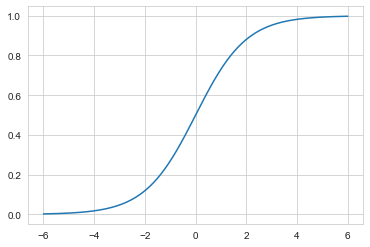

In [14]:
plt.plot(a,b)

In [15]:
df= sm.datasets.fair.load_pandas().data  # specific way to load data from stats model

In [16]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [17]:
df['had_affairs']=df['affairs'].apply(lambda a : 0 if a==0 else 1)

In [19]:
df[df['had_affairs']==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affairs
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0


In [20]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [21]:
df.groupby('had_affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
had_affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


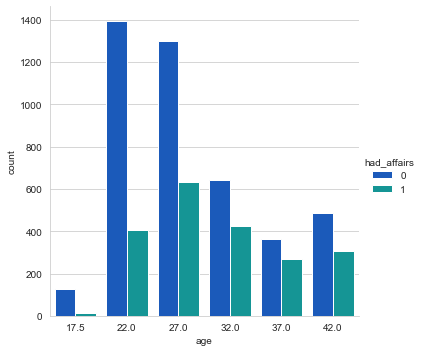

In [25]:
sns.factorplot('age',hue='had_affairs',kind='count',data=df,palette='winter')

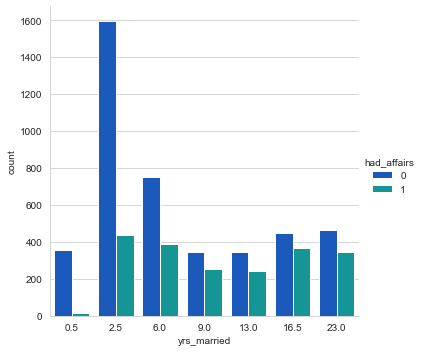

In [26]:
sns.factorplot('yrs_married',hue='had_affairs',kind='count',data=df,palette='winter')

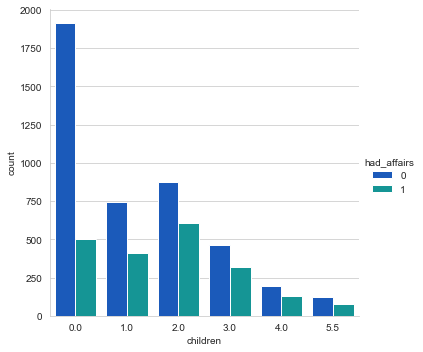

In [28]:
sns.factorplot('children',hue='had_affairs',kind='count',data=df,palette='winter')

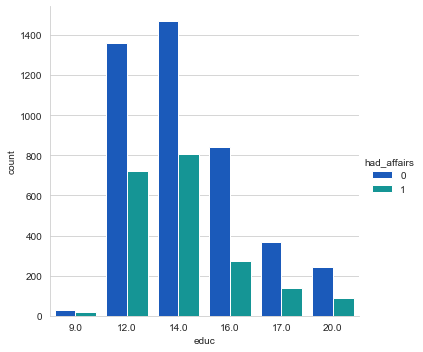

In [30]:
sns.factorplot('educ',hue='had_affairs',kind='count',data=df,palette='winter')

In [31]:
occ_dummy = pd.get_dummies(df.occupation)

In [32]:
occ_hus_dummy= pd.get_dummies(df.occupation_husb)

In [33]:
occ_dummy

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6361,0,0,0,1,0,0
6362,0,0,0,0,1,0
6363,0,0,1,0,0,0
6364,0,0,1,0,0,0


In [34]:
occ_hus_dummy

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
6361,0,0,1,0,0,0
6362,0,0,0,0,1,0
6363,1,0,0,0,0,0
6364,0,0,0,1,0,0


In [36]:
occ_dummy.columns=['occ1','occ2','occ3','occ4','occ5','occ6']

In [37]:
occ_hus_dummy.columns=['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [38]:
x=df.drop(['occupation_husb','occupation','had_affairs'],axis=1)

In [39]:
x

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666
...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000


In [40]:
dummy = pd.concat([occ_hus_dummy,occ_dummy], axis=1)

In [41]:
dummy

,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6
0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0,0,1,0,0,0,0,0,0,1,0,0
6362,0,0,0,0,1,0,0,0,0,0,1,0
6363,1,0,0,0,0,0,0,0,1,0,0,0
6364,0,0,0,1,0,0,0,0,1,0,0,0


In [42]:
x=pd.concat([x,dummy],axis=1)

In [43]:
x

,rate_marriage,age,yrs_married,children,religious,educ,affairs,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,0,0,0,1,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,0,1,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,0,0,1,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000,0,0,0,1,0,0,0,0,1,0,0,0


In [45]:
y=df.had_affairs
y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: had_affairs, Length: 6366, dtype: int64

In [46]:
# due to multicolinearity we need gto drop one occ1 and hocc1

In [48]:
x

,rate_marriage,age,yrs_married,children,religious,educ,affairs,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6,occ1,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,0,0,0,1,0,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,0,1,0,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,0,0,1,0,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0.000000,0,0,1,0,0,0,0,0,0,1,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0.000000,0,0,0,0,1,0,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0.000000,1,0,0,0,0,0,0,0,1,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0.000000,0,0,0,1,0,0,0,0,1,0,0,0


In [49]:
x=x.drop(['occ1','hocc1'],axis=1)

In [50]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,hocc2,hocc3,hocc4,hocc5,hocc6,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,0,0,1,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,0,1,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,1,0,0,0


In [51]:
x=x.drop(['affairs'],axis=1)

In [52]:
x

,rate_marriage,age,yrs_married,children,religious,educ,hocc2,hocc3,hocc4,hocc5,hocc6,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0,0,0,1,0,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,0,1,0,0,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,0,0,1,0,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,0,1,0,0,0,0,0,1,0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,0,0,0,1,0,0,0,0,1,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,0,0,0,0,0,0,1,0,0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,0,0,1,0,0,0,1,0,0,0


In [55]:
y=np.ravel(y)

In [56]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [58]:
log = LogisticRegression()

In [59]:
log.fit(x,y)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
log.score(x,y)

0.7260446120012567

In [62]:
y.mean()# percent of women having affairs

0.3224945020420987

In [63]:
1-y.mean() # percent of women not having affairs

0.6775054979579014

In [64]:
cooef_df = DataFrame(zip(x.columns,np.transpose(log.coef_)))

In [65]:
cooef_df

,0,1
0,rate_marriage,[-0.7148217295323235]
1,age,[-0.05601141221974553]
2,yrs_married,[0.1025454144978633]
3,children,[0.019955723504631692]
4,religious,[-0.36562642019627345]
5,educ,[0.016731046451245773]
6,hocc2,[0.4753419058318584]
7,hocc3,[0.6237087767847963]
8,hocc4,[0.41836999123269203]
9,hocc5,[0.4581063758571945]


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [67]:
log.fit(x_train,y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
pred=log.predict(x_test)

In [73]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
metrics.accuracy_score(y_test,pred)

0.707286432160804